#01.Import Libraries

In [1]:
#import new libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

#02.Import Data

In [2]:
#create path
path = r'/Users/juliewhitton/Desktop/Instacart Basket Analysis/'


In [3]:
#import newest dataframe
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'new_ords_prods.pkl'))

#03.Bar Charts

<AxesSubplot:>

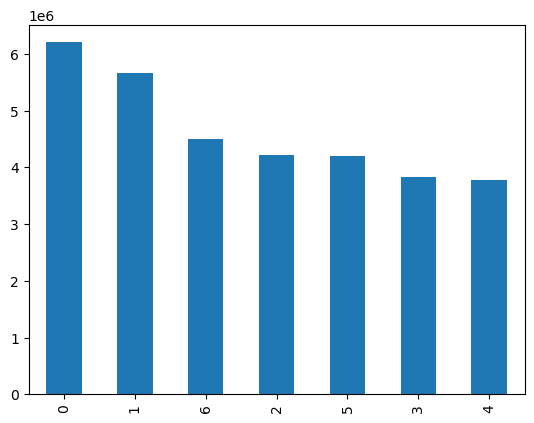

In [4]:
#create a bar chart
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

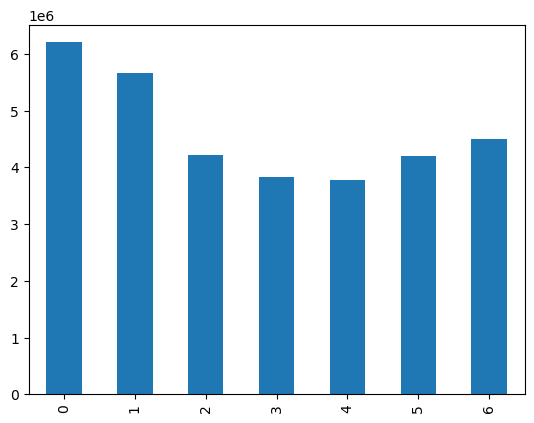

In [5]:
#try sort_index() function
ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

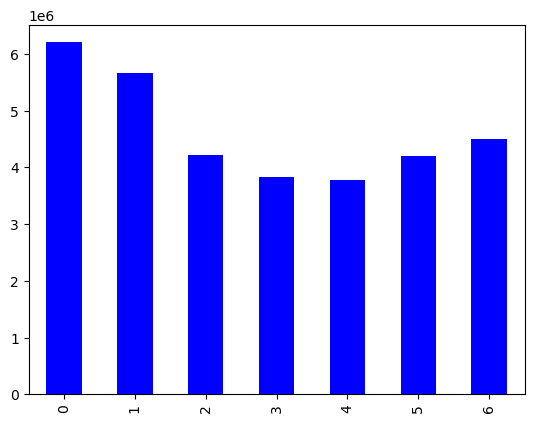

In [6]:
#save bar chart in notebook as bar object
bar = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['blue'])

In [7]:
#export bar chart as image
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

#04.Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

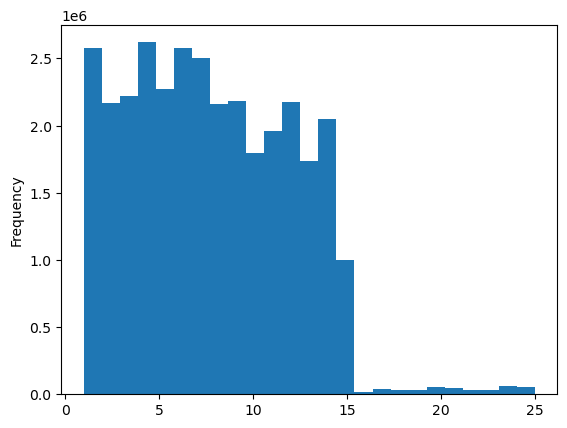

In [8]:
#create a histogram for the 'prices' column
ords_prods_merge['prices'].plot.hist(bins = 25)

In [9]:
#run describe on df
ords_prods_merge['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

[Text(0.5, 0, 'Price in Dollars'),
 Text(0, 0.5, 'Number of Products in Millions'),
 Text(0.5, 1.0, 'Number of Products Offered by Price')]

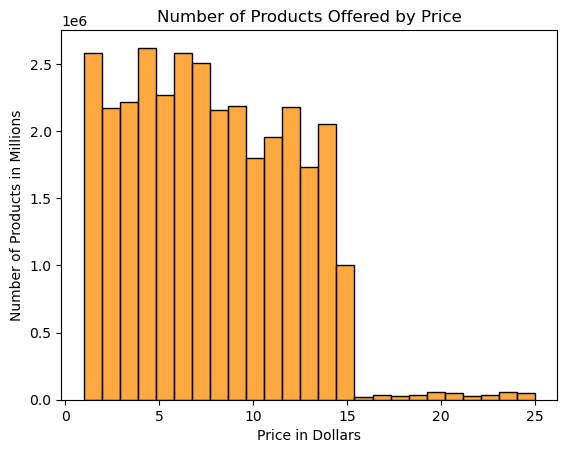

In [11]:
#retry histogram
color = ['darkorange']

product_price_hist = sns.histplot(data = ords_prods_merge, x = 'prices', color = color, bins = 25)


product_price_hist.set(xlabel = 'Price in Dollars', ylabel = 'Number of Products in Millions', 
                      title = 'Number of Products Offered by Price')

#05.Export Histogram

In [12]:
#export histogram
product_price_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_histogram.png'))

#06.Sampling Data

In [13]:
#create a 70/30 sampling set
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [14]:
#test dev
dev

array([False,  True, False, ...,  True,  True,  True])

In [15]:
#create sample w/70%
big = ords_prods_merge[dev]


In [16]:
#create sample w/30%
small = ords_prods_merge[~dev]

In [17]:
#test sample values
len(ords_prods_merge)

32404859

In [18]:
len(big) + len(small)

32404859

In [19]:
#reduce sample to only include necessary columns
df_2 = small[['order_day_of_week', 'prices']]

In [20]:
#check result
df_2.head()

,order_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0


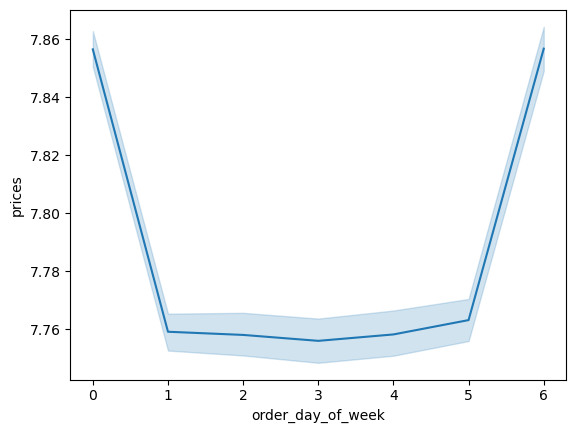

In [21]:
#create line chart
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')

In [22]:
#save line chart as png
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_dow_line.png'))

In [23]:
#export df
ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_viz.pkl'))
